In [1]:
import os
import sys

sys.path.append('/home/robinm/phd/problog/')



In [2]:
from problog.program import PrologString
from problog.prolog_engine.translate import TranslatedProgram, translate_clausedb
from problog.engine import DefaultEngine
from problog.logic import Term, Var
from problog.prolog_engine.engine_prolog import EngineProlog
from problog.formula import LogicFormula
from graphviz import Source
from problog.sdd_formula import SDD

In [17]:
file = '''
a(0) :- \+b.
b :- c, d.
0.5::c.
0.5::d.
a(X) :- e(X).
e(1).
query(a(X)).
'''

# ProbLog

In [18]:
program = PrologString(file)
engine = DefaultEngine()
db = engine.prepare(program)

1: atom(identifier=11, probability=0.5, group=None, name=c, source=c, is_extra=False)
2: atom(identifier=12, probability=0.5, group=None, name=d, source=d, is_extra=False)
3: conj(children=(1, 2), name=\+a(0))
4: atom(identifier=16, probability=None, group=None, name=e(1), source=a(1), is_extra=False)
Queries : 
* a(0) : -3 [query]
* a(1) : 4 [query]



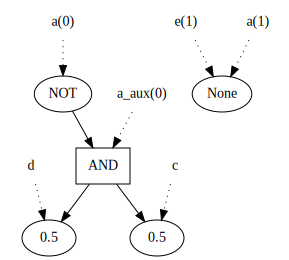

In [19]:
ground = engine.ground_all(db, target=LogicFormula(keep_all=True))
print(ground)
Source(ground.to_dot())

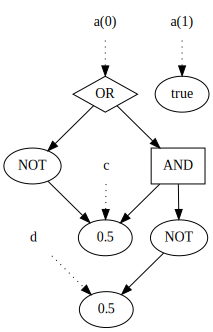

In [20]:
ac = SDD.create_from(ground)
Source(ac.to_dot())

In [21]:
ac.evaluate()

{a(0): 0.75, a(1): 1.0}

# New engine

In [8]:
program = PrologString(file)
engine = EngineProlog()
db = engine.prepare(program)
for l in translate_clausedb(db).get_lines():
    print(l)

ad([p(1.0,a(A1),1)],[neg(b(A1))])
ad([p(1.0,b(A1),2)],[c(A1),d(A1)])
ad([p(0.5,c(0),3)],[])
ad([p(0.5,d(0),4)],[])
ad([p(1.0,a(A1),5)],[e(A1)])
ad([p(1.0,e(1),6)],[])


In [9]:
ground = engine.ground_all(db, target=LogicFormula(keep_all=True))
print(ground)
Source(ground.to_dot())

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [ ]:
ac = SDD.create_from(ground)
Source(ac.to_dot())

In [ ]:
ac.evaluate()